###### DataSet  - Description

The Client

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

Project delivery:

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights. 

Data Set:

You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users

You should fully investigate and understand each data set.

Review the Source Documentation
Understand the field names and data types
Identify relationships across the files
Field/feature transformations
Determine which files should be joined versus which ones should be appended
Create master data and explain the relationship
Identify and remove duplicates
Perform other analysis like NA value and outlier detection
 

Whatever and how many slides you prepare(Be creative and come up with meaningful insight):

The idea is to create a hypothesis, engage with the data, think critically, and use various analytical approaches to produce unique insights.

You are not limited to only utilizing the data you have been provided.

We encourage you to find third party data sets which correspond to the overall theme and geographical properties of the data provided.  For Example: you can leverage US holiday data/ weather data

Also, do research on overall cab industry in US and try to relate that with the trend in data

Analysis

Create multiple hypothesis and investigate:

You will need to generate 5-7 hypothesis initially to investigate as some will not prove what you are expecting.

For Example: “Is there any seasonality in number of customers using the cab service?”

Areas to investigate:

Which company has maximum cab users at a particular time period?
Does margin proportionally increase with increase in number of customers?
What are the attributes of these customer segments?
Although not required, we encourage you to document the process and findings

What is the business problem?
What are the properties of the data provided (data intake report)
What steps did you take in order to create an applicable data set?
How did you prepare and perform your analysis?
What type of analysis did you perform?
Why did you choose to use certain analytical techniques over others?
What were the results?
Prepare a presentation that summarizes your analysis and recommendations and identify which company is performing better and is a better investment opportunity for XYZ.



### Importing the required libraries, and loading the datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
trans = pd.read_csv("Transaction_ID.csv")
cust = pd.read_csv("Customer_ID.csv")
city = pd.read_csv("City.csv")
cab = pd.read_csv("Cab_Data.csv")

In [3]:
trans.head(5)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [4]:
cust.head(5)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [5]:
#JOINING Transaction and customer table on cutomer id
cust.shape, trans.shape

((49171, 4), (440098, 3))

In [6]:
cust["Customer ID"].nunique(), trans["Transaction ID"].nunique()

(49171, 440098)

### Merging the tables

In [7]:
master_data = pd.merge(trans,cust, on= "Customer ID")
master_data

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10351127,29290,Cash,Male,28,10813
2,10412921,29290,Card,Male,28,10813
3,10000012,27703,Card,Male,27,9237
4,10320494,27703,Card,Male,27,9237
...,...,...,...,...,...,...
440093,10439799,12490,Cash,Male,33,18713
440094,10439820,14971,Card,Male,30,15346
440095,10439838,41414,Card,Male,38,3960
440096,10439840,41677,Cash,Male,23,19454


In [8]:
master_data.isnull().sum()

Transaction ID        0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [9]:
#here we can see that one customer is having many transactions

In [10]:
cab.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07/01/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03/01/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [11]:
#joining tables master_data and cab 
master_data = pd.merge(master_data, cab, on = "Transaction ID", how = "left")

In [12]:
master_data.head(10)

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,29290,Card,Male,28,10813,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10351127,29290,Cash,Male,28,10813,21/07/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228
2,10412921,29290,Card,Male,28,10813,23/11/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020
3,10000012,27703,Card,Male,27,9237,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
4,10320494,27703,Card,Male,27,9237,21/04/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192
5,10324737,27703,Cash,Male,27,9237,04/05/2018,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088
6,10395626,27703,Card,Male,27,9237,27/10/2018,Pink Cab,ATLANTA GA,13.39,167.03,141.9340
7,10000013,28712,Cash,Male,53,11242,02/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
8,10079404,28712,Card,Male,53,11242,21/09/2016,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080
9,10186994,28712,Card,Male,53,11242,23/06/2017,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564


In [13]:
master_data.isnull().sum()

Transaction ID            0
Customer ID               0
Payment_Mode              0
Gender                    0
Age                       0
Income (USD/Month)        0
Date of Travel        80706
Company               80706
City                  80706
KM Travelled          80706
Price Charged         80706
Cost of Trip          80706
dtype: int64

In [14]:
#hence we can see that there are around 80706 transactioncs without any details about the cost, and city, hence we remove those transactions

In [15]:
master_data.shape
#we can see that there are some missing values in the dataset, as not all transaction details are mentioned in cab dataset

(440098, 12)

In [16]:
city.head(5)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [17]:
cab.shape

(359392, 7)

In [18]:
#treating missing values, around 18% data is missing
master_data.isnull().sum()/len(master_data)*100

Transaction ID         0.000000
Customer ID            0.000000
Payment_Mode           0.000000
Gender                 0.000000
Age                    0.000000
Income (USD/Month)     0.000000
Date of Travel        18.338188
Company               18.338188
City                  18.338188
KM Travelled          18.338188
Price Charged         18.338188
Cost of Trip          18.338188
dtype: float64

<AxesSubplot: xlabel='Company', ylabel='Price Charged'>

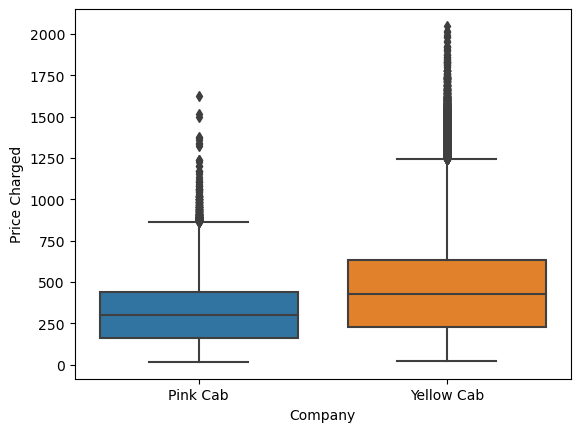

In [19]:
#checking the effect of price charged as per the companies
sb.boxplot(x = master_data["Company"], y = master_data["Price Charged"])
#we can see that price charged by yellow cab is more than charged by pink cab

In [20]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440098 entries, 0 to 440097
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      440098 non-null  int64  
 1   Customer ID         440098 non-null  int64  
 2   Payment_Mode        440098 non-null  object 
 3   Gender              440098 non-null  object 
 4   Age                 440098 non-null  int64  
 5   Income (USD/Month)  440098 non-null  int64  
 6   Date of Travel      359392 non-null  object 
 7   Company             359392 non-null  object 
 8   City                359392 non-null  object 
 9   KM Travelled        359392 non-null  float64
 10  Price Charged       359392 non-null  float64
 11  Cost of Trip        359392 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 43.6+ MB


### Missing Value Treatments

<AxesSubplot: ylabel='Density'>

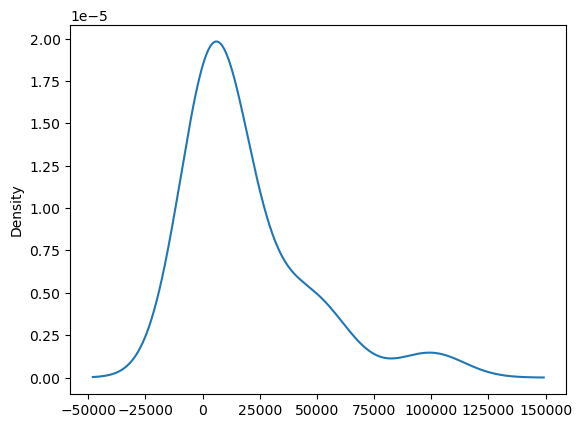

In [21]:
#checking the distribution of City before treating missing values
master_data["City"].value_counts().plot(kind = "kde")

In [22]:
master_data = master_data.set_index("Customer ID")

In [23]:
#treating the missing values in City column based on the customers
sample = pd.DataFrame(master_data[master_data["City"].isna()])
df = pd.DataFrame(master_data.groupby(master_data.index)["City"].apply(lambda x: x.mode()))

In [24]:
merge_data = pd.merge(sample, df, on = "Customer ID")
merge_data = pd.DataFrame(merge_data["City_y"])
merge_data

,City_y
Customer ID,
8294,LOS ANGELES CA
7388,LOS ANGELES CA
502,NEW YORK NY
533,NEW YORK NY
590,NEW YORK NY
...,...
56772,NASHVILLE TN
27745,ATLANTA GA
35996,AUSTIN TX


In [25]:

master_data =pd.merge(master_data, merge_data, on = "Customer ID", how = "left")
master_data["City"]=np.where(master_data["City"].isna(), master_data["City_y"], master_data["City"])

In [26]:
master_data.drop("City_y", axis = 1,inplace = True)
master_data.isnull().sum()

Transaction ID            0
Payment_Mode              0
Gender                    0
Age                       0
Income (USD/Month)        0
Date of Travel        80722
Company               80722
City                  80207
KM Travelled          80722
Price Charged         80722
Cost of Trip          80722
dtype: int64

In [27]:
master_data = master_data.reset_index()

<AxesSubplot: ylabel='Density'>

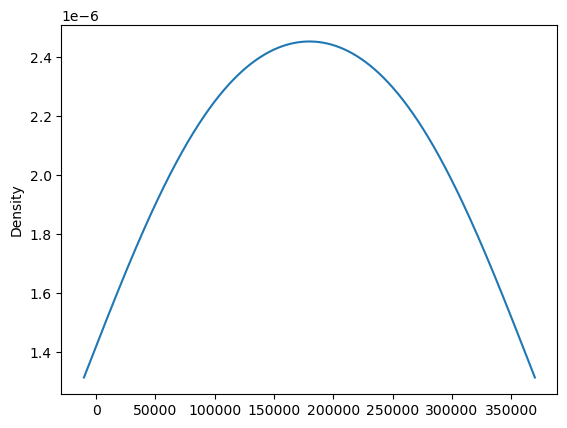

In [28]:
#checking the distribution of Company before treating missing values
master_data["Company"].value_counts().plot(kind = "kde")

In [29]:
#replacing the missing values in City column based on the Company
df2 = pd.DataFrame(master_data.groupby("City")["Company"].apply(lambda x: x.mode()))

In [30]:
df2

,,Company
City,,
ATLANTA GA,0,Yellow Cab
AUSTIN TX,0,Yellow Cab
BOSTON MA,0,Yellow Cab
CHICAGO IL,0,Yellow Cab
DALLAS TX,0,Yellow Cab
DENVER CO,0,Yellow Cab
LOS ANGELES CA,0,Yellow Cab
MIAMI FL,0,Yellow Cab
NASHVILLE TN,0,Pink Cab


In [31]:
ind = master_data[master_data["Company"].isnull()].index
for i in ind:
    if master_data.loc[i, "City"] == "NASHVILLE TN":
        master_data.loc[i,"Company"] = "Pink Cab"
    elif master_data.loc[i, "City"] == "PITTSBURGH PA":
        master_data.loc[i,"Company"] = "Pink Cab"
    elif master_data.loc[i,"City"] == "SACRAMENTO CA":
        master_data.loc[i,"Company"] = "Pink Cab"
    elif master_data.loc[i,"City"] == "SAN DIEGO CA":
        master_data.loc[i,"Company"] = "Pink Cab"
    
    else:
        master_data.loc[i,"Company"] = "Yellow Cab"

In [32]:
master_data.isnull().sum()

Customer ID               0
Transaction ID            0
Payment_Mode              0
Gender                    0
Age                       0
Income (USD/Month)        0
Date of Travel        80722
Company                   0
City                  80207
KM Travelled          80722
Price Charged         80722
Cost of Trip          80722
dtype: int64

<AxesSubplot: ylabel='Density'>

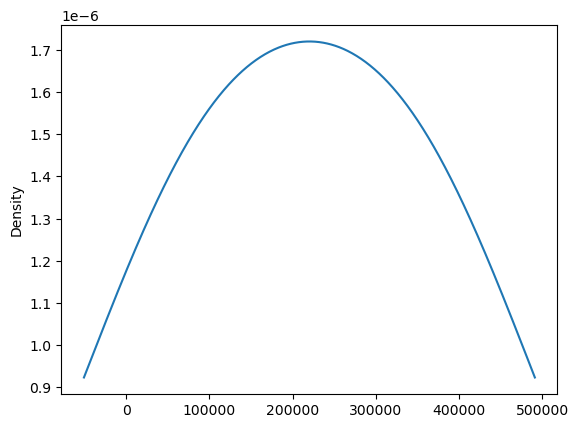

In [33]:
#checking the distribution of City after treating missing values
master_data["Company"].value_counts().plot(kind = "kde")

<AxesSubplot: ylabel='Density'>

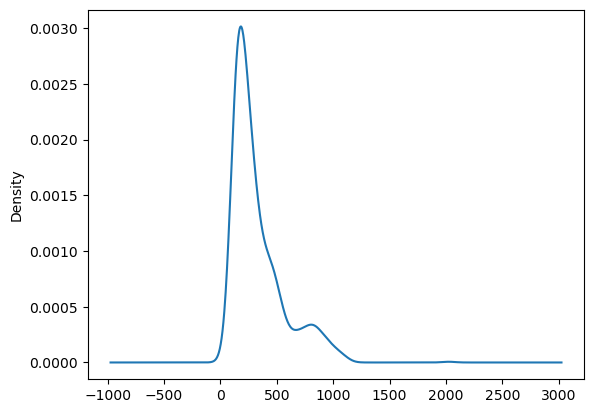

In [34]:
#checking the distribution of Date of Travel before treating missing values
master_data["Date of Travel"].value_counts().plot(kind = "kde")

In [35]:
#treating missing values inside Date of Travel clumn based on city
df3 = pd.DataFrame(master_data.groupby("City")["Date of Travel"].apply(lambda x: x.mode()))

In [36]:
df3

,,Date of Travel
City,,
ATLANTA GA,0,05/01/2018
AUSTIN TX,0,05/01/2018
BOSTON MA,0,05/01/2018
CHICAGO IL,0,05/01/2018
DALLAS TX,0,05/01/2018
DENVER CO,0,05/01/2018
LOS ANGELES CA,0,05/01/2018
MIAMI FL,0,05/01/2018
NASHVILLE TN,0,05/01/2018


In [37]:
ind = master_data[master_data["Date of Travel"].isnull()].index
for i in ind:
    if master_data.loc[i, "City"] == "PITTSBURGH PA":
        master_data.loc[i,"Date of Travel"] = "17/12/2017"
    elif master_data.loc[i, "City"] == "TUCSON AZ":
        master_data.loc[i,"Date of Travel"] = "13/10/2018"
    else:
        master_data.loc[i,"Date of Travel"] = "05/01/2018"

In [38]:
master_data.isnull().sum()

Customer ID               0
Transaction ID            0
Payment_Mode              0
Gender                    0
Age                       0
Income (USD/Month)        0
Date of Travel            0
Company                   0
City                  80207
KM Travelled          80722
Price Charged         80722
Cost of Trip          80722
dtype: int64

<AxesSubplot: ylabel='Density'>

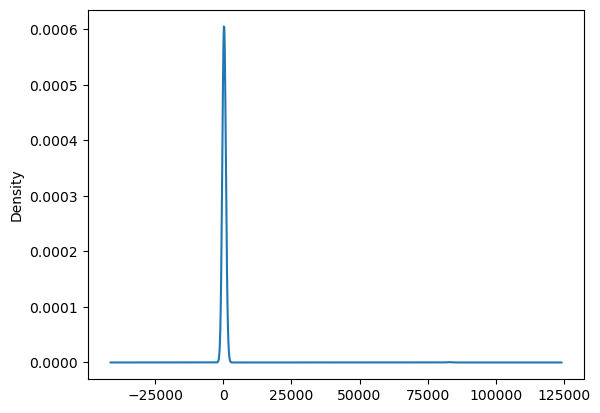

In [39]:
#checking the distribution of Date of Travel after treating missing values
master_data["Date of Travel"].value_counts().plot(kind = "kde")

In [40]:
master_data.groupby(["Company"])["City"].apply(lambda x: x.mode())


Company      
Pink Cab    0    LOS ANGELES CA
Yellow Cab  0       NEW YORK NY
Name: City, dtype: object

In [41]:
ind = master_data[master_data["City"].isnull()].index
for i in ind:
    if master_data.loc[i, "Company"] == "Pink Cab":
        master_data.loc[i,"City"] = "LOS ANGELES CA"
    else:
        master_data.loc[i,"City"] = "NEW YORK NY"

<AxesSubplot: ylabel='Density'>

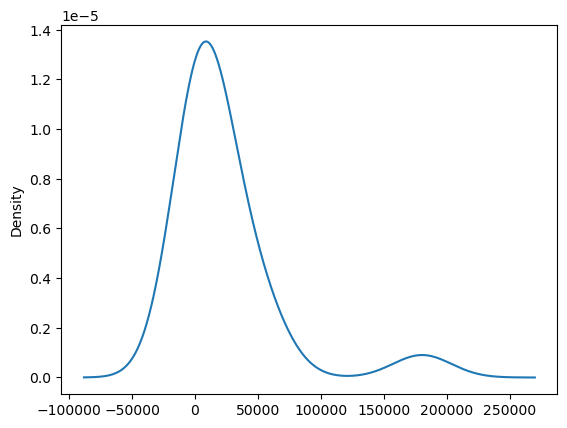

In [42]:
#checking the distribution of Date of Travel before treating missing values
master_data["City"].value_counts().plot(kind = "kde")

In [43]:
master_data

,Customer ID,Transaction ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,29290,10000011,Card,Male,28,10813,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,29290,10351127,Cash,Male,28,10813,21/07/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228
2,29290,10412921,Card,Male,28,10813,23/11/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020
3,27703,10000012,Card,Male,27,9237,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
4,27703,10320494,Card,Male,27,9237,21/04/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192
...,...,...,...,...,...,...,...,...,...,...,...,...
440329,12490,10439799,Cash,Male,33,18713,03/01/2018,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720
440330,14971,10439820,Card,Male,30,15346,05/01/2018,Yellow Cab,NEW YORK NY,NaN,NaN,NaN
440331,41414,10439838,Card,Male,38,3960,04/01/2018,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600
440332,41677,10439840,Cash,Male,23,19454,06/01/2018,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600


<AxesSubplot: ylabel='Density'>

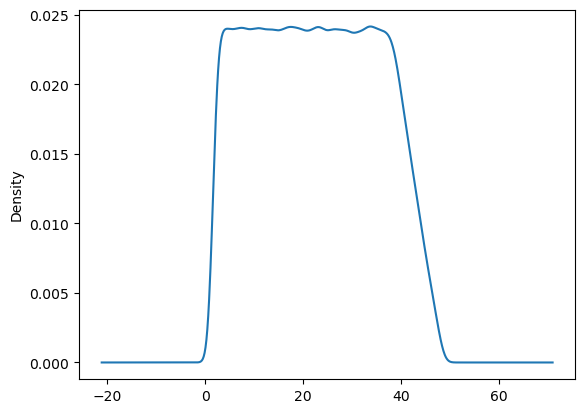

In [44]:
#checking the distribution of KM Travelled before treating missing values
master_data["KM Travelled"].plot(kind = "kde")

In [45]:
#treating the missing values in KM travlled column based on multiple attributes
master_data["KM Travelled"] = master_data["KM Travelled"].fillna(master_data.groupby(["Customer ID","City", "Company"])["KM Travelled"].transform("mean"))

In [46]:
master_data.isnull().sum()

Customer ID               0
Transaction ID            0
Payment_Mode              0
Gender                    0
Age                       0
Income (USD/Month)        0
Date of Travel            0
Company                   0
City                      0
KM Travelled          80221
Price Charged         80722
Cost of Trip          80722
dtype: int64

In [47]:
master_data["KM Travelled"] = master_data["KM Travelled"].fillna(master_data.groupby(["Income (USD/Month)"])["KM Travelled"].transform("mean"))
master_data.isnull().sum()

Customer ID               0
Transaction ID            0
Payment_Mode              0
Gender                    0
Age                       0
Income (USD/Month)        0
Date of Travel            0
Company                   0
City                      0
KM Travelled          17396
Price Charged         80722
Cost of Trip          80722
dtype: int64

In [48]:
master_data["KM Travelled"] = master_data["KM Travelled"].fillna(master_data.groupby(["Age"])["KM Travelled"].transform("mean"))
master_data.isnull().sum()

Customer ID               0
Transaction ID            0
Payment_Mode              0
Gender                    0
Age                       0
Income (USD/Month)        0
Date of Travel            0
Company                   0
City                      0
KM Travelled              0
Price Charged         80722
Cost of Trip          80722
dtype: int64

<AxesSubplot: ylabel='Density'>

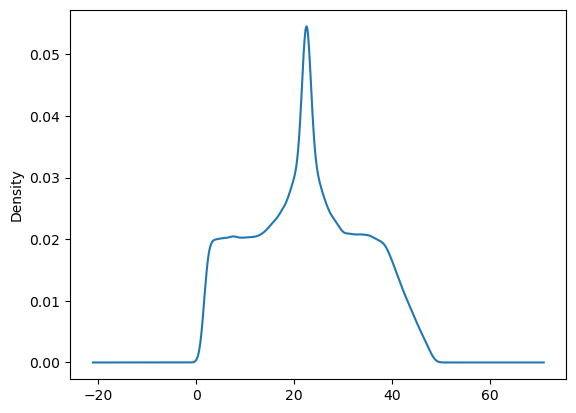

In [49]:
#checking the distribution of KM Travelled after treating missing values
master_data["KM Travelled"].plot(kind = "kde")

### Outlier Treatment

In [50]:
master_data[["Customer ID", "Transaction ID"]] = master_data[["Customer ID", "Transaction ID"]].astype(object) 
file_num = master_data.select_dtypes(include = np.number)
#checking for outliers
for i in file_num.columns:
    q1=file_num[i].quantile(0.25)
    q3=file_num[i].quantile(0.75)
    iqr=q3-q1
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
#print('The lower bound is:',lb)
#print('the upper bound is:',ub)

    age_out_count=((file_num[i]>ub) | (file_num[i]<lb)).sum()
    print('The outlier percentage for ',i,' ',age_out_count/len(file_num)*100)

The outlier percentage for  Age   0.0
The outlier percentage for  Income (USD/Month)   0.0
The outlier percentage for  KM Travelled   0.0
The outlier percentage for  Price Charged   1.3548806133525915
The outlier percentage for  Cost of Trip   0.0


In [51]:
#Treating outliers in Price Charged column

q1=master_data["Price Charged"].quantile(0.25)
q3=master_data["Price Charged"].quantile(0.75)
iqr=q3-q1
ub=q3+1.5*iqr
lb=q1-1.5*iqr
uc = master_data["Price Charged"].quantile(0.99)
lc = master_data["Price Charged"].quantile(0.01)

for ind in master_data["Price Charged"].index:
    if master_data.loc[ind,"Price Charged"]>ub:
        master_data.loc[ind,"Price Charged"] = uc
    elif master_data.loc[ind,"Price Charged"]<lb:
        master_data.loc[ind,i] = lc

<AxesSubplot: >

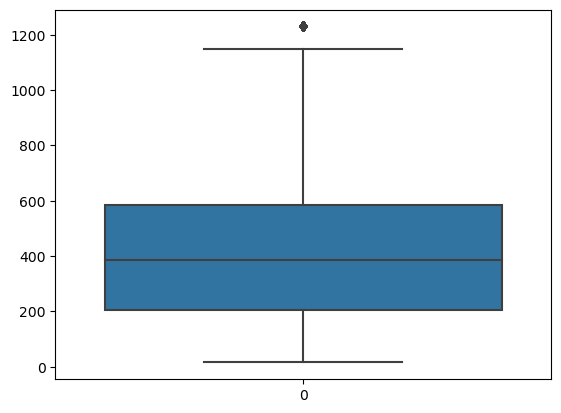

In [52]:
sb.boxplot(master_data["Price Charged"])

In [53]:
master_data.head(5)

,Customer ID,Transaction ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,29290,10000011,Card,Male,28,10813,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,29290,10351127,Cash,Male,28,10813,21/07/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228
2,29290,10412921,Card,Male,28,10813,23/11/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020
3,27703,10000012,Card,Male,27,9237,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
4,27703,10320494,Card,Male,27,9237,21/04/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192


### Predicting the Cost of Trip using Decission Tree Regression

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [55]:
test= master_data[master_data["Price Charged"].isnull()]
test.head(5)

,Customer ID,Transaction ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
1416,8294,10433266,Cash,Male,28,14024,05/01/2018,Yellow Cab,LOS ANGELES CA,27.452727,NaN,NaN
1597,7388,10438405,Card,Male,37,10894,05/01/2018,Yellow Cab,LOS ANGELES CA,13.728462,NaN,NaN
2065,502,10437101,Card,Male,28,15285,05/01/2018,Yellow Cab,NEW YORK NY,18.655667,NaN,NaN
2209,533,10433568,Card,Male,52,15974,05/01/2018,Yellow Cab,NEW YORK NY,26.487429,NaN,NaN
2312,590,10439229,Cash,Male,62,18608,05/01/2018,Yellow Cab,NEW YORK NY,20.554516,NaN,NaN


In [56]:
#taking only required columns, and converting all to numerical data
X = master_data[~master_data["Cost of Trip"].isnull()]
X

,Customer ID,Transaction ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,29290,10000011,Card,Male,28,10813,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,29290,10351127,Cash,Male,28,10813,21/07/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228
2,29290,10412921,Card,Male,28,10813,23/11/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020
3,27703,10000012,Card,Male,27,9237,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
4,27703,10320494,Card,Male,27,9237,21/04/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192
...,...,...,...,...,...,...,...,...,...,...,...,...
440328,38520,10439790,Card,Female,42,19417,07/01/2018,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144
440329,12490,10439799,Cash,Male,33,18713,03/01/2018,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720
440331,41414,10439838,Card,Male,38,3960,04/01/2018,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600
440332,41677,10439840,Cash,Male,23,19454,06/01/2018,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600


In [57]:
Y_data = X["Cost of Trip"]
X_data = X.drop(["Price Charged", "Cost of Trip"], axis = 1)

In [58]:
X_data.head(5)

,Customer ID,Transaction ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled
0,29290,10000011,Card,Male,28,10813,08/01/2016,Pink Cab,ATLANTA GA,30.45
1,29290,10351127,Cash,Male,28,10813,21/07/2018,Yellow Cab,ATLANTA GA,26.19
2,29290,10412921,Card,Male,28,10813,23/11/2018,Yellow Cab,ATLANTA GA,42.55
3,27703,10000012,Card,Male,27,9237,06/01/2016,Pink Cab,ATLANTA GA,28.62
4,27703,10320494,Card,Male,27,9237,21/04/2018,Yellow Cab,ATLANTA GA,36.38


In [59]:
#chaging it to numerical data
X_set = X_data.drop(["Customer ID", "Transaction ID", "Date of Travel"], axis = 1)
test_data = test.drop(["Customer ID", "Transaction ID", "Date of Travel", "Price Charged", "Cost of Trip"], axis = 1)



In [60]:
for ind in test_data.index:
    if ind == 2209:
        test_data.loc[ind, "City"] = "PITTSBURGH PA"

In [61]:
X_set = pd.get_dummies(X_set,columns = ["Payment_Mode", "Company", "City"])

In [62]:
X_set = pd.get_dummies(X_set,columns = ["Gender"])

In [63]:
X_set

,Age,Income (USD/Month),KM Travelled,Payment_Mode_Card,Payment_Mode_Cash,Company_Pink Cab,Company_Yellow Cab,City_ATLANTA GA,City_AUSTIN TX,City_BOSTON MA,...,City_PHOENIX AZ,City_PITTSBURGH PA,City_SACRAMENTO CA,City_SAN DIEGO CA,City_SEATTLE WA,City_SILICON VALLEY,City_TUCSON AZ,City_WASHINGTON DC,Gender_Female,Gender_Male
0,28,10813,30.45,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,28,10813,26.19,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,28,10813,42.55,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,27,9237,28.62,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,27,9237,36.38,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440328,42,19417,16.66,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
440329,33,18713,13.72,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
440331,38,3960,19.00,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
440332,23,19454,5.60,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [64]:
#splitting and scaling the data
X_train,X_test, y_train, y_test = train_test_split(X_set, Y_data, test_size=0.25, random_state= 2)

<AxesSubplot: ylabel='Density'>

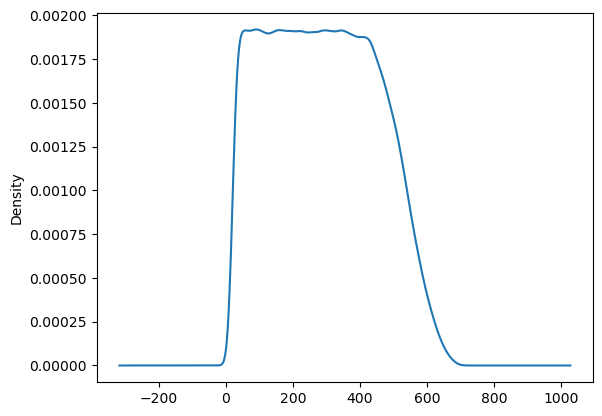

In [65]:
#checking the distribution of Cpst of Trip after treating missing values
master_data["Cost of Trip"].plot(kind = "kde")

In [66]:
X_train.columns

Index(['Age', 'Income (USD/Month)', 'KM Travelled', 'Payment_Mode_Card',
       'Payment_Mode_Cash', 'Company_Pink Cab', 'Company_Yellow Cab',
       'City_ATLANTA GA', 'City_AUSTIN TX', 'City_BOSTON MA',
       'City_CHICAGO IL', 'City_DALLAS TX', 'City_DENVER CO',
       'City_LOS ANGELES CA', 'City_MIAMI FL', 'City_NASHVILLE TN',
       'City_NEW YORK NY', 'City_ORANGE COUNTY', 'City_PHOENIX AZ',
       'City_PITTSBURGH PA', 'City_SACRAMENTO CA', 'City_SAN DIEGO CA',
       'City_SEATTLE WA', 'City_SILICON VALLEY', 'City_TUCSON AZ',
       'City_WASHINGTON DC', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [67]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_sc = sc.fit_transform(X_train[["Age", "Income (USD/Month)", "KM Travelled"]])
X_test_sc = sc.transform(X_test[["Age", "Income (USD/Month)", "KM Travelled"]])

In [68]:
X_test_sc

array([[0.19148936, 0.42793939, 0.28590022],
       [0.42553191, 0.24363636, 0.83861171],
       [0.        , 0.61587879, 0.00607375],
       ...,
       [0.89361702, 0.07742424, 0.84381779],
       [0.14893617, 0.5040303 , 0.22950108],
       [0.36170213, 0.89309091, 0.19305857]])

In [69]:
from sklearn.tree import DecisionTreeRegressor
DC = DecisionTreeRegressor()
model = DC.fit(X_train_sc, y_train)
y_pred =DC.predict(X_test_sc)

In [70]:
y_pred

array([214.524, 534.072,  26.16 , ..., 538.56 , 172.224, 137.376])

In [71]:
test_data2 = pd.get_dummies(test_data,columns = ["Payment_Mode","Gender", "Company", "City"])
test_data2= test_data2[['Age', 'Income (USD/Month)', 'KM Travelled', 'Payment_Mode_Card',
       'Payment_Mode_Cash', 'Company_Pink Cab', 'Company_Yellow Cab',
       'City_ATLANTA GA', 'City_AUSTIN TX', 'City_BOSTON MA',
       'City_CHICAGO IL', 'City_DALLAS TX', 'City_DENVER CO',
       'City_LOS ANGELES CA', 'City_MIAMI FL', 'City_NASHVILLE TN',
       'City_NEW YORK NY', 'City_ORANGE COUNTY', 'City_PHOENIX AZ',
       'City_PITTSBURGH PA', 'City_SACRAMENTO CA', 'City_SAN DIEGO CA',
       'City_SEATTLE WA', 'City_SILICON VALLEY', 'City_TUCSON AZ',
       'City_WASHINGTON DC', 'Gender_Female', 'Gender_Male']]
test_data2["KM Travelled"] = test_data2["KM Travelled"].round(2)

### Calculating the R2 score for regression model predictions

In [72]:
#checking accuracy score
y_pred = np.round(y_pred ,2)
from sklearn.metrics import r2_score
print("Accuracy Score is :", r2_score(y_test,y_pred))

Accuracy Score is : 0.9267616473392185


In [73]:
test_data2

,Age,Income (USD/Month),KM Travelled,Payment_Mode_Card,Payment_Mode_Cash,Company_Pink Cab,Company_Yellow Cab,City_ATLANTA GA,City_AUSTIN TX,City_BOSTON MA,...,City_PHOENIX AZ,City_PITTSBURGH PA,City_SACRAMENTO CA,City_SAN DIEGO CA,City_SEATTLE WA,City_SILICON VALLEY,City_TUCSON AZ,City_WASHINGTON DC,Gender_Female,Gender_Male
1416,28,14024,27.45,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1597,37,10894,13.73,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2065,28,15285,18.66,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2209,52,15974,26.49,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2312,62,18608,20.55,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440313,51,18919,23.21,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
440315,18,4531,22.55,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
440319,23,3226,25.63,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
440323,20,30662,22.61,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [74]:
test_data_sc = sc.transform(test_data2[["Age", "Income (USD/Month)", "KM Travelled"]])
test_data_sc

array([[0.21276596, 0.36436364, 0.55422993],
       [0.40425532, 0.26951515, 0.25661605],
       [0.21276596, 0.40257576, 0.36355748],
       ...,
       [0.10638298, 0.03715152, 0.51475054],
       [0.04255319, 0.86854545, 0.44924078],
       [0.25531915, 0.40442424, 0.68221258]])

In [75]:
predict =DC.predict(test_data_sc)

In [76]:
test_data["predict"]= pd.DataFrame(predict)

In [77]:
test_data

,Payment_Mode,Gender,Age,Income (USD/Month),Company,City,KM Travelled,predict
1416,Cash,Male,28,14024,Yellow Cab,LOS ANGELES CA,27.452727,348.2208
1597,Card,Male,37,10894,Yellow Cab,LOS ANGELES CA,13.728462,310.4640
2065,Card,Male,28,15285,Yellow Cab,NEW YORK NY,18.655667,304.0416
2209,Card,Male,52,15974,Yellow Cab,PITTSBURGH PA,26.487429,324.5760
2312,Cash,Male,62,18608,Yellow Cab,NEW YORK NY,20.554516,235.0080
...,...,...,...,...,...,...,...,...
440313,Card,Female,51,18919,Yellow Cab,NEW YORK NY,23.210000,NaN
440315,Card,Female,18,4531,Yellow Cab,NEW YORK NY,22.551991,NaN
440319,Card,Male,23,3226,Yellow Cab,NEW YORK NY,25.631818,NaN
440323,Cash,Male,20,30662,Yellow Cab,NEW YORK NY,22.605591,NaN


In [78]:
test_data.groupby(["Company", "City"])["predict"].mean()

Company     City          
Pink Cab    NASHVILLE TN      271.920000
            SACRAMENTO CA            NaN
            SAN DIEGO CA      272.865600
Yellow Cab  ATLANTA GA        252.623333
            AUSTIN TX                NaN
            BOSTON MA         203.673600
            CHICAGO IL        295.617435
            DALLAS TX                NaN
            DENVER CO                NaN
            LOS ANGELES CA    293.110467
            MIAMI FL                 NaN
            NEW YORK NY       280.338141
            ORANGE COUNTY            NaN
            PHOENIX AZ               NaN
            PITTSBURGH PA     324.576000
            SEATTLE WA               NaN
            SILICON VALLEY           NaN
            TUCSON AZ                NaN
            WASHINGTON DC     264.471100
Name: predict, dtype: float64

In [79]:
ind = test_data[test_data["predict"].isnull()].index
for i in ind:
    if test_data.loc[i, "City"] == "PITTSBURGH PA":
        test_data.loc[i,"predict"] = 324.57
    elif test_data.loc[i, "City"] == "NEW YORK NY":
        test_data.loc[i,"predict"] = 284.61
    elif test_data.loc[i, "City"] == "WASHINGTON DC":
        test_data.loc[i,"predict"] = 279.81
    elif test_data.loc[i, "City"] == "LOS ANGELES CA":
        test_data.loc[i,"predict"] = 284.02
    elif test_data.loc[i, "City"] == "CHICAGO IL":
        test_data.loc[i,"predict"] = 291.77
    elif test_data.loc[i, "City"] == "BOSTON MA":
        test_data.loc[i,"predict"] = 275.89
    elif test_data.loc[i, "City"] == "ATLANTA GA":
        test_data.loc[i,"predict"] = 296.35
    elif test_data.loc[i, "City"] == "SAN DIEGO CA":
        test_data.loc[i,"predict"] = 285.07
    elif test_data.loc[i, "City"] == "NASHVILLE TN":
        test_data.loc[i,"predict"] = 282.74

In [80]:
test_data.isnull().sum()

Payment_Mode           0
Gender                 0
Age                    0
Income (USD/Month)     0
Company                0
City                   0
KM Travelled           0
predict               62
dtype: int64

In [81]:
test_data.groupby("Company")["predict"].mean()

Company
Pink Cab      282.813459
Yellow Cab    283.352453
Name: predict, dtype: float64

In [82]:
ind = test_data[test_data["predict"].isnull()].index
for i in ind:
    if test_data.loc[i, "Company"] == "Pink Cab":
        test_data.loc[i,"predict"] = 284.75
    else:
        test_data.loc[i,"predict"] = 284.61

In [83]:
final_test = pd.merge(test, test_data, on = test_data.index, how = "left")

In [84]:
final_test.drop(["Payment_Mode_y", "Gender_y", "Age_y", "Income (USD/Month)_y", "Company_y", "City_y", "KM Travelled_y"], axis = 1, inplace = True)

In [85]:
final_test

,key_0,Customer ID,Transaction ID,Payment_Mode_x,Gender_x,Age_x,Income (USD/Month)_x,Date of Travel,Company_x,City_x,KM Travelled_x,Price Charged,Cost of Trip,predict
0,1416,8294,10433266,Cash,Male,28,14024,05/01/2018,Yellow Cab,LOS ANGELES CA,27.452727,NaN,NaN,348.2208
1,1597,7388,10438405,Card,Male,37,10894,05/01/2018,Yellow Cab,LOS ANGELES CA,13.728462,NaN,NaN,310.4640
2,2065,502,10437101,Card,Male,28,15285,05/01/2018,Yellow Cab,NEW YORK NY,18.655667,NaN,NaN,304.0416
3,2209,533,10433568,Card,Male,52,15974,05/01/2018,Yellow Cab,NEW YORK NY,26.487429,NaN,NaN,324.5760
4,2312,590,10439229,Cash,Male,62,18608,05/01/2018,Yellow Cab,NEW YORK NY,20.554516,NaN,NaN,235.0080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80717,440313,23382,10439406,Card,Female,51,18919,05/01/2018,Yellow Cab,NEW YORK NY,23.210000,NaN,NaN,284.6100
80718,440315,21420,10439409,Card,Female,18,4531,05/01/2018,Yellow Cab,NEW YORK NY,22.551991,NaN,NaN,284.6100
80719,440319,49888,10439413,Card,Male,23,3226,05/01/2018,Yellow Cab,NEW YORK NY,25.631818,NaN,NaN,284.6100
80720,440323,46456,10439418,Cash,Male,20,30662,05/01/2018,Yellow Cab,NEW YORK NY,22.605591,NaN,NaN,284.6100


In [86]:
final_test.drop("Cost of Trip", axis = 1, inplace = True)
final_test.rename(columns = {"predict": "Cost of Trip"}, inplace = True)

In [87]:
final_test

,key_0,Customer ID,Transaction ID,Payment_Mode_x,Gender_x,Age_x,Income (USD/Month)_x,Date of Travel,Company_x,City_x,KM Travelled_x,Price Charged,Cost of Trip
0,1416,8294,10433266,Cash,Male,28,14024,05/01/2018,Yellow Cab,LOS ANGELES CA,27.452727,NaN,348.2208
1,1597,7388,10438405,Card,Male,37,10894,05/01/2018,Yellow Cab,LOS ANGELES CA,13.728462,NaN,310.4640
2,2065,502,10437101,Card,Male,28,15285,05/01/2018,Yellow Cab,NEW YORK NY,18.655667,NaN,304.0416
3,2209,533,10433568,Card,Male,52,15974,05/01/2018,Yellow Cab,NEW YORK NY,26.487429,NaN,324.5760
4,2312,590,10439229,Cash,Male,62,18608,05/01/2018,Yellow Cab,NEW YORK NY,20.554516,NaN,235.0080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80717,440313,23382,10439406,Card,Female,51,18919,05/01/2018,Yellow Cab,NEW YORK NY,23.210000,NaN,284.6100
80718,440315,21420,10439409,Card,Female,18,4531,05/01/2018,Yellow Cab,NEW YORK NY,22.551991,NaN,284.6100
80719,440319,49888,10439413,Card,Male,23,3226,05/01/2018,Yellow Cab,NEW YORK NY,25.631818,NaN,284.6100
80720,440323,46456,10439418,Cash,Male,20,30662,05/01/2018,Yellow Cab,NEW YORK NY,22.605591,NaN,284.6100


In [88]:
final_test= final_test.set_index("key_0")


In [89]:
cost = pd.DataFrame(final_test["Cost of Trip"])
cost.head(5)

,Cost of Trip
key_0,
1416,348.2208
1597,310.4640
2065,304.0416
2209,324.5760
2312,235.0080


In [90]:
master_data = master_data.combine_first(cost)

In [91]:
master_data.isnull().sum()

Age                       0
City                      0
Company                   0
Cost of Trip              0
Customer ID               0
Date of Travel            0
Gender                    0
Income (USD/Month)        0
KM Travelled              0
Payment_Mode              0
Price Charged         80722
Transaction ID            0
dtype: int64

In [92]:
#predicting the value of Price Charged
X = master_data[~master_data["Price Charged"].isnull()]
X

,Age,City,Company,Cost of Trip,Customer ID,Date of Travel,Gender,Income (USD/Month),KM Travelled,Payment_Mode,Price Charged,Transaction ID
0,28,ATLANTA GA,Pink Cab,313.6350,29290,08/01/2016,Male,10813,30.45,Card,370.95,10000011
1,28,ATLANTA GA,Yellow Cab,317.4228,29290,21/07/2018,Male,10813,26.19,Cash,598.70,10351127
2,28,ATLANTA GA,Yellow Cab,597.4020,29290,23/11/2018,Male,10813,42.55,Card,792.05,10412921
3,27,ATLANTA GA,Pink Cab,334.8540,27703,06/01/2016,Male,9237,28.62,Card,358.52,10000012
4,27,ATLANTA GA,Yellow Cab,467.1192,27703,21/04/2018,Male,9237,36.38,Card,721.10,10320494
...,...,...,...,...,...,...,...,...,...,...,...,...
440328,42,SEATTLE WA,Yellow Cab,213.9144,38520,07/01/2018,Female,19417,16.66,Card,261.18,10439790
440329,33,SILICON VALLEY,Yellow Cab,172.8720,12490,03/01/2018,Male,18713,13.72,Cash,277.97,10439799
440331,38,TUCSON AZ,Yellow Cab,232.5600,41414,04/01/2018,Male,3960,19.00,Card,303.77,10439838
440332,23,TUCSON AZ,Yellow Cab,70.5600,41677,06/01/2018,Male,19454,5.60,Cash,92.42,10439840


### Predicting the value of Price Charged, using different methods

In [93]:
test= master_data[master_data["Price Charged"].isnull()]
test.head(5)

,Age,City,Company,Cost of Trip,Customer ID,Date of Travel,Gender,Income (USD/Month),KM Travelled,Payment_Mode,Price Charged,Transaction ID
1416,28,LOS ANGELES CA,Yellow Cab,348.2208,8294,05/01/2018,Male,14024,27.452727,Cash,NaN,10433266
1597,37,LOS ANGELES CA,Yellow Cab,310.4640,7388,05/01/2018,Male,10894,13.728462,Card,NaN,10438405
2065,28,NEW YORK NY,Yellow Cab,304.0416,502,05/01/2018,Male,15285,18.655667,Card,NaN,10437101
2209,52,NEW YORK NY,Yellow Cab,324.5760,533,05/01/2018,Male,15974,26.487429,Card,NaN,10433568
2312,62,NEW YORK NY,Yellow Cab,235.0080,590,05/01/2018,Male,18608,20.554516,Cash,NaN,10439229


In [94]:
#chaging it to numerical data
X_set = X.drop(["Customer ID", "Transaction ID", "Date of Travel", "Price Charged"], axis = 1)
test_data = test.drop(["Customer ID", "Transaction ID", "Date of Travel", "Price Charged"], axis = 1)
for ind in test_data.index:
    if ind == 2209:
        test_data.loc[ind, "City"] = "PITTSBURGH PA"

In [95]:

Y_data = X["Price Charged"]
X_set = pd.get_dummies(X_set, columns = ["Payment_Mode","Gender", "Company", "City"])
X_train,X_test, y_train, y_test = train_test_split(X_set, Y_data, test_size=0.25, random_state= 2)
sc = MinMaxScaler()
X_train_sc = sc.fit_transform(X_train[["Age", "Income (USD/Month)", "KM Travelled", "Cost of Trip"]])
X_test_sc = sc.transform(X_test[["Age", "Income (USD/Month)", "KM Travelled", "Cost of Trip"]])

In [96]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=15, max_features=10)
model = RF.fit(X_train_sc,y_train)
y_pred_rf = RF.predict(X_test_sc)

In [97]:
from sklearn.metrics import r2_score
print("Accuracy is:", r2_score(y_test,y_pred_rf))

Accuracy is: 0.7373434030492112


In [98]:
from sklearn.neighbors import KNeighborsRegressor
range = [15,55,80,120]
for k in range:
    knn = KNeighborsRegressor(n_neighbors=k)
    model = knn.fit(X_train_sc, y_train)
    y_pred_knn= knn.predict(X_test_sc)
    
    print("Accuracy is:", r2_score(y_test,y_pred_knn))

Accuracy is: 0.7508707506404692
Accuracy is: 0.7558936793059988
Accuracy is: 0.7553544079712764
Accuracy is: 0.7543507090587691


In [99]:
from sklearn.linear_model import Ridge
Rd = Ridge(alpha=8)
model = Rd.fit(X_train_sc, y_train)
y_pred_rd = Rd.predict(X_test_sc)
print("Accuracy is:", r2_score(y_test,y_pred_rd))

Accuracy is: 0.748955790687202


In [100]:
from sklearn.tree import DecisionTreeRegressor
DC = DecisionTreeRegressor(min_samples_leaf= 15, max_depth= 5, max_features=6)
model = DC.fit(X_train_sc, y_train)
y_pred_dc =DC.predict(X_test_sc)
print("Accuracy is:", r2_score(y_test,y_pred_dc))

Accuracy is: 0.752261658739587


In [101]:
#hence KNN , for n_neighbours = 55, gives max accuracy
knn = KNeighborsRegressor(n_neighbors=55)
model = knn.fit(X_train_sc, y_train)
y_pred_knn= knn.predict(X_test_sc)
    
print("Accuracy is:", r2_score(y_test,y_pred_knn))

Accuracy is: 0.7558936793059988


In [102]:
X_train.columns

Index(['Age', 'Cost of Trip', 'Income (USD/Month)', 'KM Travelled',
       'Payment_Mode_Card', 'Payment_Mode_Cash', 'Gender_Female',
       'Gender_Male', 'Company_Pink Cab', 'Company_Yellow Cab',
       'City_ATLANTA GA', 'City_AUSTIN TX', 'City_BOSTON MA',
       'City_CHICAGO IL', 'City_DALLAS TX', 'City_DENVER CO',
       'City_LOS ANGELES CA', 'City_MIAMI FL', 'City_NASHVILLE TN',
       'City_NEW YORK NY', 'City_ORANGE COUNTY', 'City_PHOENIX AZ',
       'City_PITTSBURGH PA', 'City_SACRAMENTO CA', 'City_SAN DIEGO CA',
       'City_SEATTLE WA', 'City_SILICON VALLEY', 'City_TUCSON AZ',
       'City_WASHINGTON DC'],
      dtype='object')

In [103]:
test_data2 = pd.get_dummies(test_data,columns = ["Payment_Mode","Gender", "Company", "City"])
test_data2= test_data2[['Age', 'Income (USD/Month)', 'KM Travelled', 'Cost of Trip',
       'Payment_Mode_Card', 'Payment_Mode_Cash', 'Gender_Female',
       'Gender_Male', 'Company_Pink Cab', 'Company_Yellow Cab',
       'City_ATLANTA GA', 'City_AUSTIN TX', 'City_BOSTON MA',
       'City_CHICAGO IL', 'City_DALLAS TX', 'City_DENVER CO',
       'City_LOS ANGELES CA', 'City_MIAMI FL', 'City_NASHVILLE TN',
       'City_NEW YORK NY', 'City_ORANGE COUNTY', 'City_PHOENIX AZ',
       'City_PITTSBURGH PA', 'City_SACRAMENTO CA', 'City_SAN DIEGO CA',
       'City_SEATTLE WA', 'City_SILICON VALLEY', 'City_TUCSON AZ',
       'City_WASHINGTON DC']]
test_data2["KM Travelled"] = test_data2["KM Travelled"].round(2)


In [104]:
test_data_sc = sc.transform(test_data2[["Age", "Income (USD/Month)", "KM Travelled", "Cost of Trip"]])
test_data_sc

array([[0.21276596, 0.36436364, 0.55422993, 0.48976614],
       [0.40425532, 0.26951515, 0.25661605, 0.43359714],
       [0.21276596, 0.40257576, 0.36355748, 0.42404284],
       ...,
       [0.10638298, 0.03715152, 0.51475054, 0.39513538],
       [0.04255319, 0.86854545, 0.44924078, 0.39513538],
       [0.25531915, 0.40442424, 0.68221258, 0.39513538]])

In [105]:
predict = knn.predict(test_data_sc)

In [106]:
test_data["predict"]= predict
test_data

,Age,City,Company,Cost of Trip,Gender,Income (USD/Month),KM Travelled,Payment_Mode,predict
1416,28,LOS ANGELES CA,Yellow Cab,348.2208,Male,14024,27.452727,Cash,528.066545
1597,37,LOS ANGELES CA,Yellow Cab,310.4640,Male,10894,13.728462,Card,374.992545
2065,28,NEW YORK NY,Yellow Cab,304.0416,Male,15285,18.655667,Card,387.020545
2209,52,PITTSBURGH PA,Yellow Cab,324.5760,Male,15974,26.487429,Card,508.198909
2312,62,NEW YORK NY,Yellow Cab,235.0080,Male,18608,20.554516,Cash,367.236727
...,...,...,...,...,...,...,...,...,...
440313,51,NEW YORK NY,Yellow Cab,284.6100,Female,18919,23.210000,Card,429.064545
440315,18,NEW YORK NY,Yellow Cab,284.6100,Female,4531,22.551991,Card,408.957818
440319,23,NEW YORK NY,Yellow Cab,284.6100,Male,3226,25.631818,Card,393.846364
440323,20,NEW YORK NY,Yellow Cab,284.6100,Male,30662,22.605591,Cash,450.764545


In [107]:
test_data.isnull().sum()

Age                   0
City                  0
Company               0
Cost of Trip          0
Gender                0
Income (USD/Month)    0
KM Travelled          0
Payment_Mode          0
predict               0
dtype: int64

In [108]:
test_data.rename(columns = {"predict": "Price Charged"}, inplace = True)
test_data

,Age,City,Company,Cost of Trip,Gender,Income (USD/Month),KM Travelled,Payment_Mode,Price Charged
1416,28,LOS ANGELES CA,Yellow Cab,348.2208,Male,14024,27.452727,Cash,528.066545
1597,37,LOS ANGELES CA,Yellow Cab,310.4640,Male,10894,13.728462,Card,374.992545
2065,28,NEW YORK NY,Yellow Cab,304.0416,Male,15285,18.655667,Card,387.020545
2209,52,PITTSBURGH PA,Yellow Cab,324.5760,Male,15974,26.487429,Card,508.198909
2312,62,NEW YORK NY,Yellow Cab,235.0080,Male,18608,20.554516,Cash,367.236727
...,...,...,...,...,...,...,...,...,...
440313,51,NEW YORK NY,Yellow Cab,284.6100,Female,18919,23.210000,Card,429.064545
440315,18,NEW YORK NY,Yellow Cab,284.6100,Female,4531,22.551991,Card,408.957818
440319,23,NEW YORK NY,Yellow Cab,284.6100,Male,3226,25.631818,Card,393.846364
440323,20,NEW YORK NY,Yellow Cab,284.6100,Male,30662,22.605591,Cash,450.764545


In [109]:
master_data["Price Charged"] = master_data["Price Charged"].combine_first(test_data["Price Charged"])

In [110]:
master_data.head(10)

,Age,City,Company,Cost of Trip,Customer ID,Date of Travel,Gender,Income (USD/Month),KM Travelled,Payment_Mode,Price Charged,Transaction ID
0,28,ATLANTA GA,Pink Cab,313.6350,29290,08/01/2016,Male,10813,30.45,Card,370.95,10000011
1,28,ATLANTA GA,Yellow Cab,317.4228,29290,21/07/2018,Male,10813,26.19,Cash,598.70,10351127
2,28,ATLANTA GA,Yellow Cab,597.4020,29290,23/11/2018,Male,10813,42.55,Card,792.05,10412921
3,27,ATLANTA GA,Pink Cab,334.8540,27703,06/01/2016,Male,9237,28.62,Card,358.52,10000012
4,27,ATLANTA GA,Yellow Cab,467.1192,27703,21/04/2018,Male,9237,36.38,Card,721.10,10320494
5,27,ATLANTA GA,Yellow Cab,87.5088,27703,04/05/2018,Male,9237,6.18,Cash,138.40,10324737
6,27,ATLANTA GA,Pink Cab,141.9340,27703,27/10/2018,Male,9237,13.39,Card,167.03,10395626
7,53,ATLANTA GA,Pink Cab,97.6320,28712,02/01/2016,Male,11242,9.04,Cash,125.20,10000013
8,53,ATLANTA GA,Yellow Cab,494.2080,28712,21/09/2016,Male,11242,39.60,Card,704.30,10079404
9,53,ATLANTA GA,Yellow Cab,246.6564,28712,23/06/2017,Male,11242,18.19,Card,365.63,10186994


In [111]:
master_data.isnull().sum()

Age                   0
City                  0
Company               0
Cost of Trip          0
Customer ID           0
Date of Travel        0
Gender                0
Income (USD/Month)    0
KM Travelled          0
Payment_Mode          0
Price Charged         0
Transaction ID        0
dtype: int64

In [112]:
master_data.to_excel("master_data.xlsx")